## Crime Data

In [ ]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
def clean_column_name(name):
    # Remove special characters and numbers from the column names
    return re.sub(r'[^A-Za-z]+', '', name)

folder_path = '/content/Crime_data'
files = os.listdir(folder_path)

# Initialize an empty DataFrame to hold all the data
all_data = pd.DataFrame()

# Loop over each file in the directory
for file in files:
    if file.startswith('texas_crime_rate_') and file.endswith('.xls'):
        # Extract the year from the file name
        year = file.replace('texas_crime_rate_', '').replace('.xls', '')

        # Read the data from the file
        file_path = os.path.join(folder_path, file)
        data = pd.read_excel(file_path)

        # Clean the column names
        data.columns = [clean_column_name(col) for col in data.columns]

        # Add a 'year' column to the data
        data['Year'] = int(year)  # Convert year to int for consistency

        # Append this data to the all_data DataFrame
        all_data = pd.concat([all_data, data], ignore_index=True)

# Handle possible duplicate columns after renaming by grouping and summing them
all_data = all_data.groupby(level=0, axis=1).sum()

# Save the aggregated data to a new Excel file
output_file_path = '/content/Crime_data/aggregated_texas_crime_rate_2007_2019.xlsx'
all_data.to_excel(output_file_path, index=False)

1. Crime Analysis

In [ ]:

# Load the dataset
df = pd.read_excel("/content/aggregated_texas_crime_rate_2007_2019.xlsx")


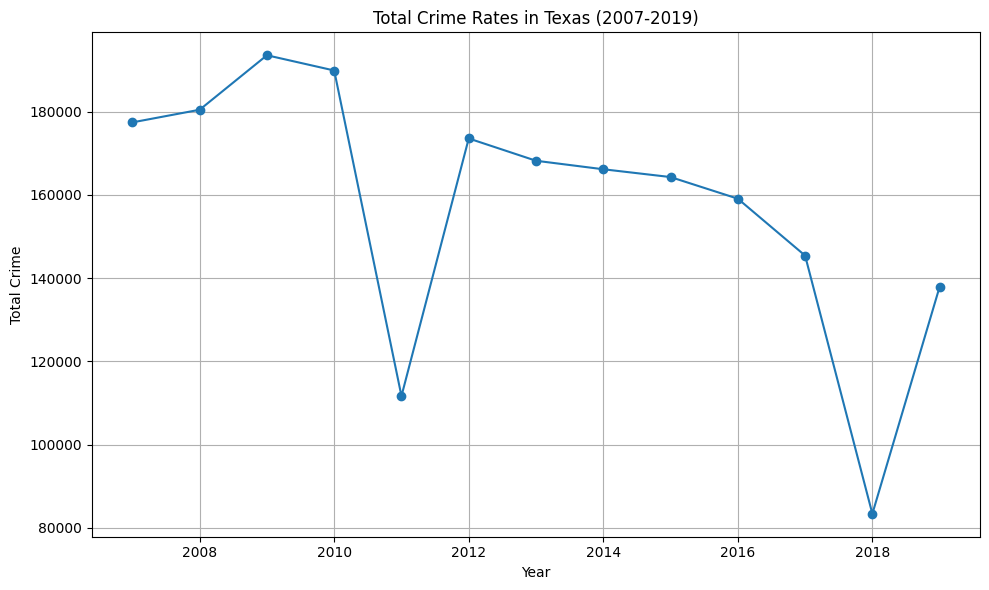

In [ ]:
# Group the data by 'Year' and calculate the sum of 'Violent crime' and 'Property crime' for each year
df['Total Crime'] = df['Burglary'] + df['Larceny-theft'] + df['Motor vehicle theft'] + df['Robbery'] + df['Violent crime'] + df['Murder and nonnegligent manslaughter'] + df['Rape'] + df['Aggravated assault']
yearly_crime_totals = df.groupby('Year')['Total Crime'].sum().reset_index()

# Plot the trend over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_crime_totals['Year'], yearly_crime_totals['Total Crime'], marker='o')
plt.title('Total Crime in Texas (2007-2019)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.grid(True)
plt.tight_layout()
plt.show()

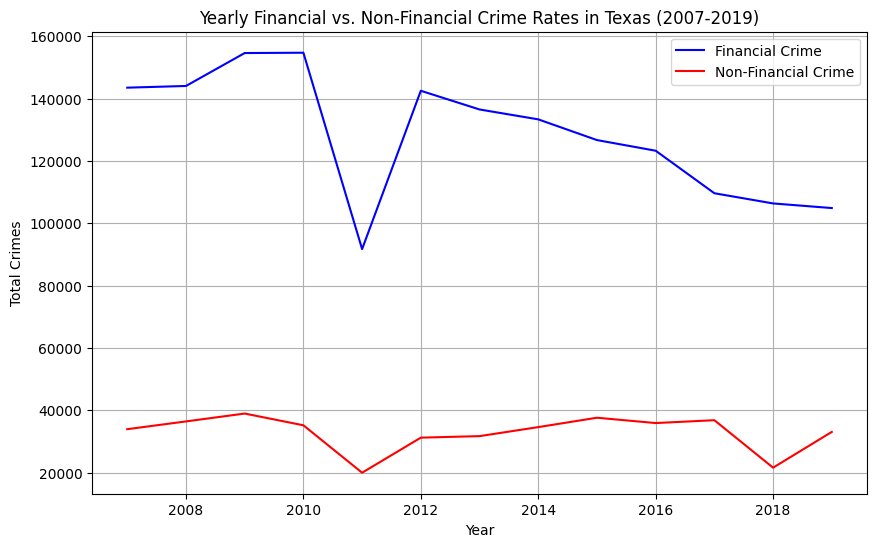

In [ ]:
# Categorizing crimes
df['Financial Crime'] = df['Burglary'] + df['Larceny-theft'] + df['Motor vehicle theft'] + df['Robbery']
df['Non-Financial Crime'] = df['Violent crime'] + df['Murder and nonnegligent manslaughter'] + df['Rape'] + df['Aggravated assault']

# Yearly Trend Analysis
yearly_financial = df.groupby('Year')['Financial Crime'].sum()
yearly_non_financial = df.groupby('Year')['Non-Financial Crime'].sum()

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_financial, color='blue', label='Financial Crime')
sns.lineplot(data=yearly_non_financial, color='red', label='Non-Financial Crime')
plt.title('Yearly Financial vs. Non-Financial Crime Rates in Texas (2007-2019)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.legend()
plt.show()

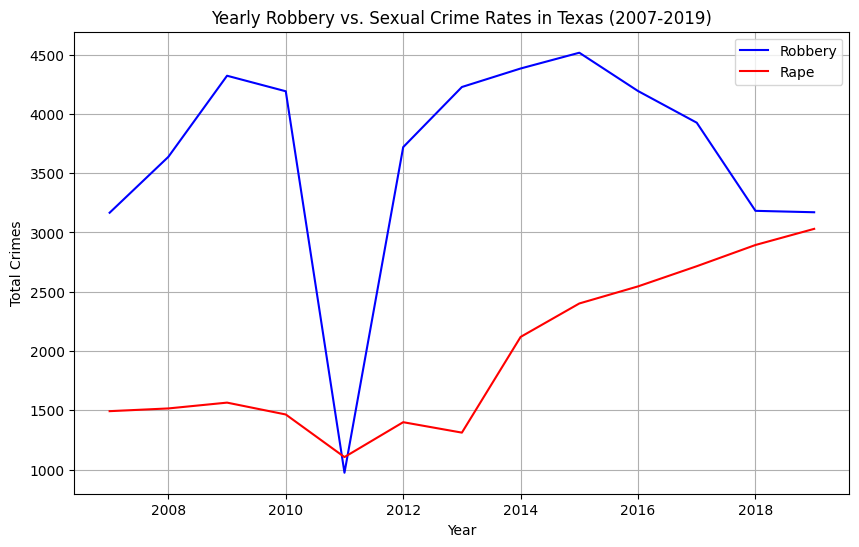

In [ ]:
# Yearly Trend Analysis
robbery = df.groupby('Year')['Robbery'].sum()
rape = df.groupby('Year')['Rape'].sum()

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=robbery, color='blue', label='Robbery')
sns.lineplot(data=rape, color='red', label='Rape')
plt.title('Yearly Robbery vs. Sexual Crime Rates in Texas (2007-2019)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# This will remove leading and trailing spaces
df['Metropolitan/Non-metropolitan'] = df['Metropolitan/Non-metropolitan'].str.strip()

# After stripping, check again for unique values to ensure they are now consistent
print(df['Metropolitan/Non-metropolitan'].unique())


['Metropolitan Counties' 'Nonmetropolitan Counties']


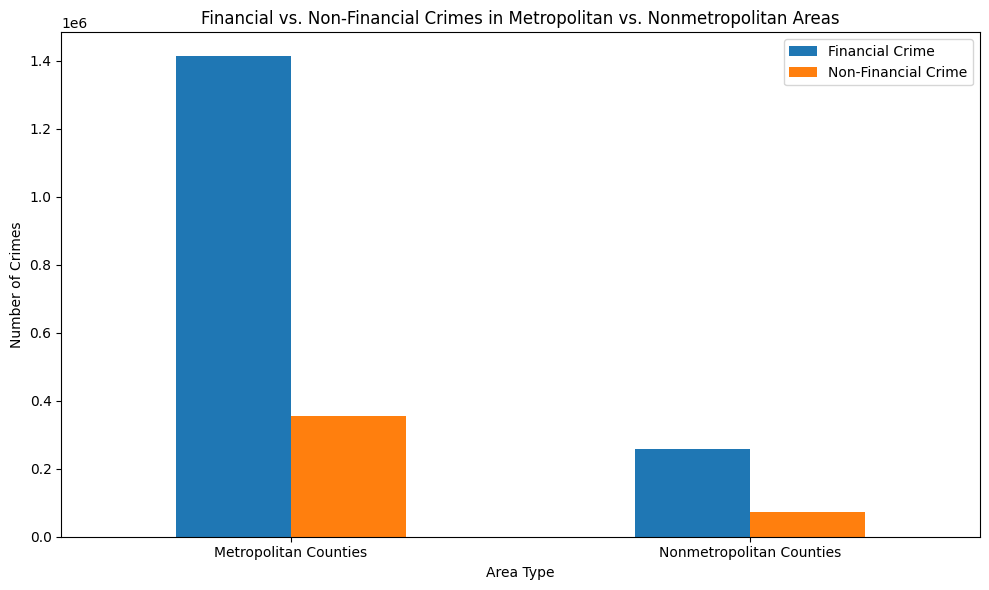

In [ ]:
# Re-aggregate the data after cleaning
grouped_data = df.groupby('Metropolitan/Non-metropolitan')[['Financial Crime', 'Non-Financial Crime']].sum()

# Plot the cleaned and aggregated data
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Financial vs. Non-Financial Crimes in Metropolitan vs. Nonmetropolitan Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)  # Make sure the labels are readable
plt.tight_layout()  # Fit the layout nicely
plt.show()

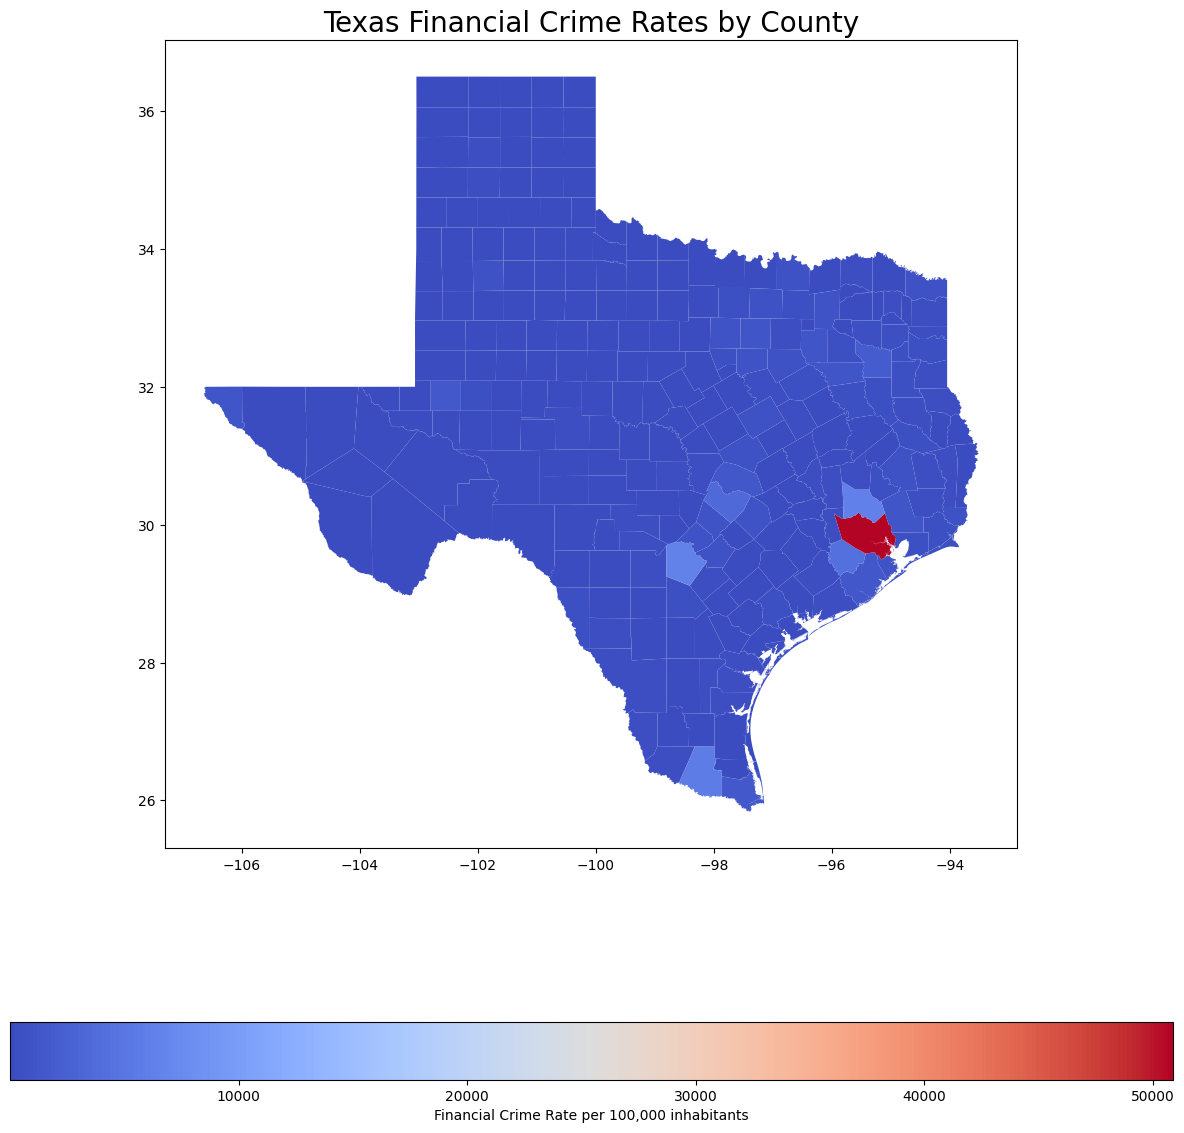

In [ ]:
# Load the shapefile
gdf = gpd.read_file('/content/County.shp')

# Clean up the 'County' column in the crime data
df['County'] = df['County'].str.replace(r'\d', '', regex=True).str.strip()
df['County'] = df['County'].replace({'Crockett,': 'Crockett', 'DeWitt': 'De Witt'})

# Calculate the average financial crime per county
# Assuming 'Financial Crime' column exists and is associated with years in the dataset
average_fcrime = df.groupby('County')['Financial Crime'].mean().reset_index()

# Merge the average crime data with the shapefile data
# Merge on the 'County' name
merged_data = gdf.merge(average_fcrime, left_on='CNTY_NM', right_on='County')

# Calculate the crime rate per 100,000 inhabitants
# Replace 'Population' with the actual population column from your data
merged_data['Financial Crime Rate'] = (merged_data['Financial Crime'] / 100000) * 100000

# Plotting the map with the crime rate data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_data.plot(column='Financial Crime Rate', ax=ax, legend=True, cmap='coolwarm',
                 legend_kwds={'label': "Financial Crime Rate per 100,000 inhabitants",
                              'orientation': "horizontal"})
ax.set_title('Texas Financial Crime Rates by County', fontsize=20)
plt.show()

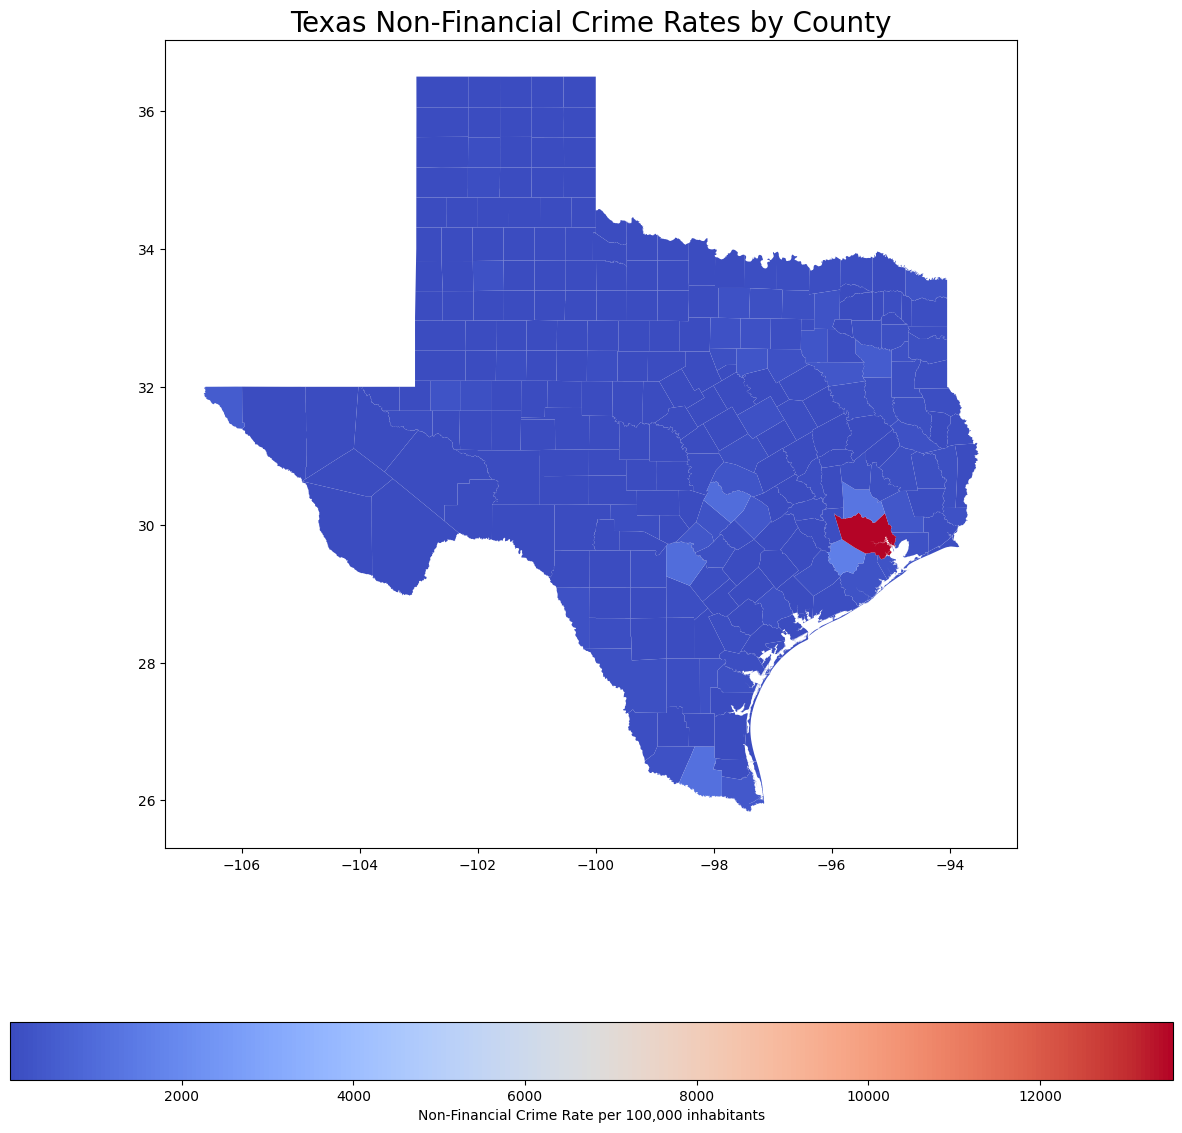

In [ ]:
# Calculate the average financial crime per county
average_nfcrime = df.groupby('County')['Non-Financial Crime'].mean().reset_index()

# Merge the average crime data with the shapefile data
# Merge on the 'County' name
merged_data = gdf.merge(average_nfcrime, left_on='CNTY_NM', right_on='County')

# Calculate the crime rate per 100,000 inhabitants
# Replace 'Population' with the actual population column from your data
merged_data['Non-Financial Crime Rate'] = (merged_data['Non-Financial Crime'] / 100000) * 100000

# Plotting the map with the crime rate data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_data.plot(column='Non-Financial Crime Rate', ax=ax, legend=True, cmap='coolwarm',
                 legend_kwds={'label': "Non-Financial Crime Rate per 100,000 inhabitants",
                              'orientation': "horizontal"})
ax.set_title('Texas Non-Financial Crime Rates by County', fontsize=20)
plt.show()

## Unemployment Data


**

In [ ]:
# Load the data
unemployment_data = pd.read_csv('/content/Raw_monthly_unemployment.csv')

# Convert 'Date' to a datetime format
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'])

# Extract the year from the datetime
unemployment_data['Year'] = unemployment_data['Date'].dt.year

# Filter the data for years between 2007 and 2019
unemployment_data_filtered = unemployment_data[(unemployment_data['Year'] >= 2007) & (unemployment_data['Year'] <= 2019)]

# Aggregate the data by year and county
# Use as_index=False to keep 'Year' and 'County' as columns
yearly_unemployment = unemployment_data_filtered.groupby(['Year', 'County'], as_index=False)['Unemployment Rate'].mean()

# Output the first 20 rows of the yearly data
print(yearly_unemployment.head(20))


    Year     County  Unemployment Rate
0   2007   Anderson           5.125000
1   2007    Andrews           3.258333
2   2007   Angelina           4.433333
3   2007    Aransas           4.108333
4   2007     Archer           3.216667
5   2007  Armstrong           3.416667
6   2007   Atascosa           4.150000
7   2007     Austin           3.800000
8   2007     Bailey           4.341667
9   2007    Bandera           3.850000
10  2007    Bastrop           4.225000
11  2007     Baylor           3.816667
12  2007       Beec           5.983333
13  2007       Bell           4.525000
14  2007      Bexar           4.175000
15  2007     Blanco           3.316667
16  2007     Borden           4.075000
17  2007     Bosque           4.341667
18  2007      Bowie           4.791667
19  2007   Brewster           3.341667


In [ ]:
# Save the aggregated data to a new Excel file
output_file_path = '/content/aggregated_texas_Unemployment_rate_2007_2019.xlsx'
yearly_unemployment.to_excel(output_file_path, index=False)

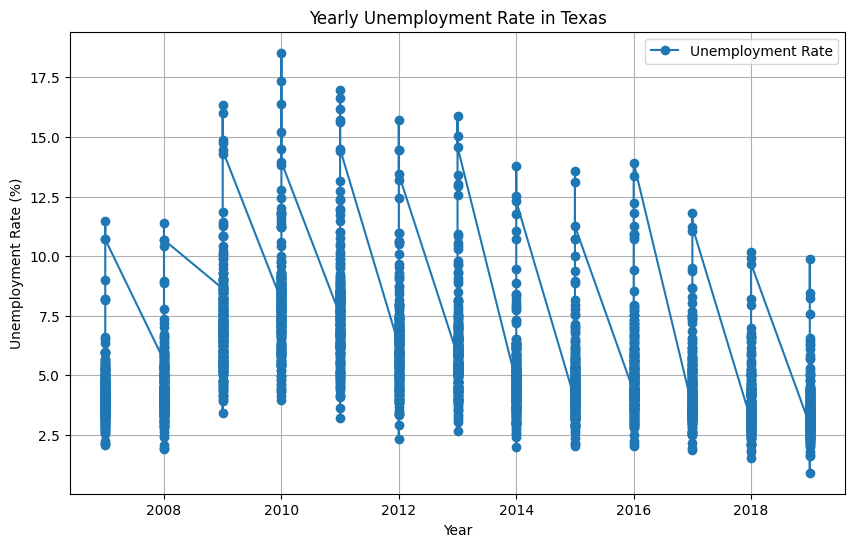

In [ ]:
#Yearly unemployment
plt.figure(figsize=(10, 6))
plt.plot(yearly_unemployment['Year'], yearly_unemployment['Unemployment Rate'], marker='o', label='Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Yearly Unemployment Rate in Texas')
plt.grid(True)
plt.legend()
plt.show()

## Unemployment & Crime

In [ ]:
# Load the datasets
unemployment_data = pd.read_excel('/content/aggregated_texas_Unemployment_rate_2007_2019.xlsx')
crime_data = pd.read_excel('/content/aggregated_texas_crime_rate_2007_2019.xlsx')

# Aggregate unemployment data by year
yearly_unemployment = unemployment_data.groupby('Year')['Unemployment Rate'].mean().reset_index()

# Aggregate financial and non-financial crimes
crime_data['Financial Crime'] = crime_data['Burglary'] + crime_data['Larceny-theft'] + crime_data['Motor vehicle theft'] + crime_data['Robbery']
crime_data['Non-Financial Crime'] = crime_data[['Violent crime', 'Murder and nonnegligent manslaughter',
                                                'Rape', 'Aggravated assault']].sum(axis=1)

yearly_financial_crime = crime_data.groupby('Year')['Financial Crime'].sum().reset_index()
yearly_non_financial_crime = crime_data.groupby('Year')['Non-Financial Crime'].sum().reset_index()


In [ ]:
# Merge the datasets on both 'Year' and 'County'
merged_data = pd.merge(unemployment_data, crime_data, on=['Year', 'County'])

# Save the merged data to a new Excel file
output_file_path = '/content/aggregated_texas_crime_unemployment_2007_2019.xlsx'
merged_data.to_excel(output_file_path, index=False)

In [ ]:
merged_data.head(10)

,Year,County,Unemployment Rate,Metropolitan/Non-metropolitan,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Financial Crime,Non-Financial Crime
0,2007,Anderson,5.125000,Nonmetropolitan Counties,70.0,3,13,4,50.0,432.0,215.0,186.0,31.0,1.0,436.0,136.0
1,2007,Andrews,3.258333,Nonmetropolitan Counties,4.0,0,1,0,3.0,94.0,18.0,72.0,4.0,0.0,94.0,8.0
2,2007,Angelina,4.433333,Nonmetropolitan Counties,189.0,4,9,12,164.0,458.0,174.0,243.0,41.0,0.0,470.0,366.0
3,2007,Aransas,4.108333,Metropolitan Counties,27.0,2,6,4,15.0,562.0,198.0,345.0,19.0,1.0,566.0,50.0
4,2007,Armstrong,3.416667,Metropolitan Counties,1.0,0,1,0,0.0,6.0,1.0,5.0,0.0,0.0,6.0,2.0
5,2007,Atascosa,4.150000,Metropolitan Counties,22.0,3,0,1,18.0,298.0,99.0,181.0,18.0,3.0,299.0,43.0
6,2007,Austin,3.800000,Metropolitan Counties,15.0,0,0,0,15.0,152.0,53.0,92.0,7.0,0.0,152.0,30.0
7,2007,Bailey,4.341667,Nonmetropolitan Counties,5.0,0,1,0,4.0,23.0,11.0,10.0,2.0,0.0,23.0,10.0
8,2007,Bandera,3.850000,Metropolitan Counties,46.0,0,7,2,37.0,302.0,112.0,176.0,14.0,5.0,304.0,90.0
9,2007,Bastrop,4.225000,Metropolitan Counties,108.0,1,2,13,92.0,981.0,422.0,492.0,67.0,5.0,994.0,203.0


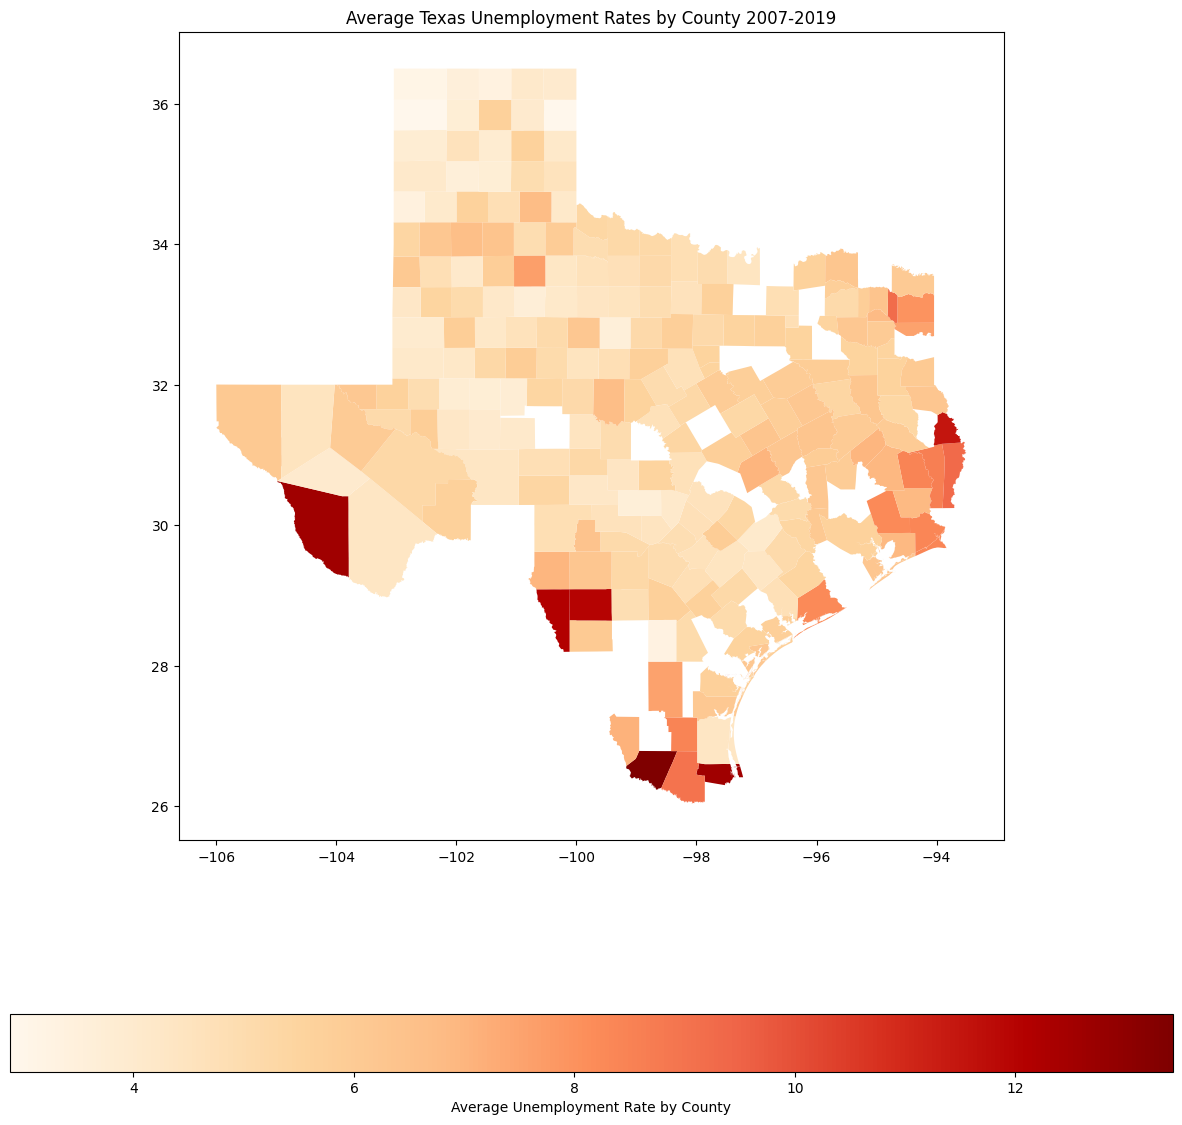

In [ ]:
# Clean up the 'County' column in the unemployment data if necessary
merged_data['County'] = merged_data['County'].str.replace(r'\d', '', regex=True).str.strip()

# Replace specific discrepancies found in county names to match the shapefile
merged_data['County'] = merged_data['County'].replace({'Crockett,': 'Crockett', 'DeWitt': 'De Witt'})

# Merge the unemployment data with the shapefile data on 'County' name
# Make sure 'CNTY_NM' in the shapefile is cleaned and matches the 'County' column in your unemployment data
merged = gdf.merge(merged_data, left_on='CNTY_NM', right_on='County')

# Aggregate to find the average unemployment rate per county
# This assumes the 'Year' column has already been filtered for the year of interest
average_unemployment = merged.groupby('CNTY_NM')['Unemployment Rate'].mean().reset_index()

# Merge the average unemployment rate with the geodataframe
merged_gdf = gdf.merge(average_unemployment, on='CNTY_NM')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf.plot(column='Unemployment Rate', ax=ax, legend=True, cmap='OrRd',
                legend_kwds={'label': "Average Unemployment Rate by County",
                             'orientation': "horizontal"})
ax.set_title('Average Texas Unemployment Rates by County 2007-2019')
plt.show()


1. Financial crime vs Unemployment Rate

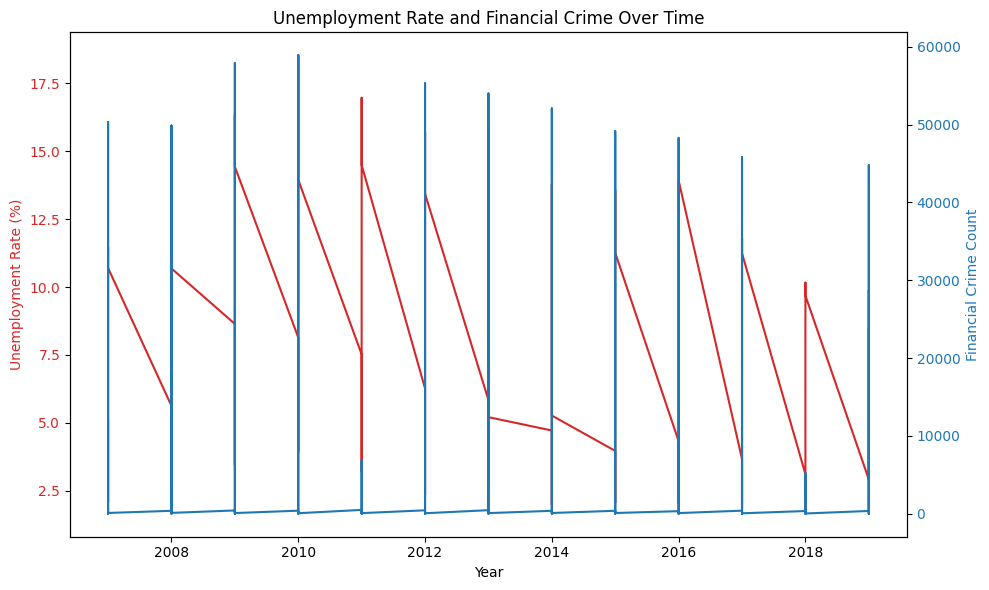

In [ ]:
# Create a figure and a first subplot with its own y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the unemployment rate on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color=color)
ax1.plot(merged_data['Year'], merged_data['Unemployment Rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second subplot with a shared x-axis and its own y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Financial Crime Count', color=color)
ax2.plot(merged_data['Year'], merged_data['Financial Crime'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and a grid
plt.title('Unemployment Rate and Financial Crime Over Time')
fig.tight_layout()

# Show the plot
plt.show()

Comment: Too much noise, no trend

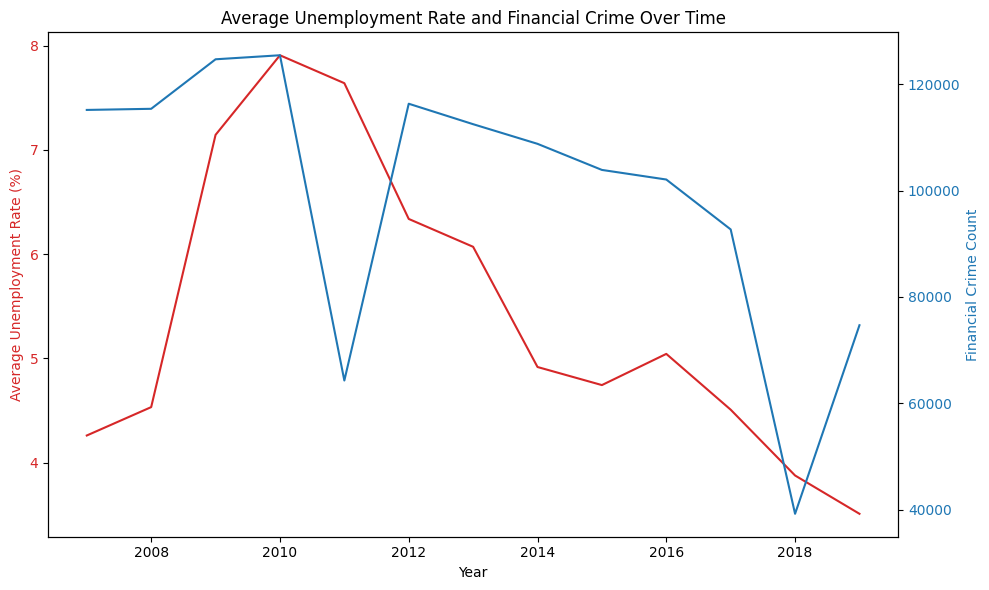

In [ ]:
aggregated_data = merged_data.groupby('Year').agg({
    'Unemployment Rate': 'mean',
    'Financial Crime': 'sum'
}).reset_index()

# Create a figure and a subplot with its own y-axis for the Unemployment Rate
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average Unemployment Rate on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Unemployment Rate (%)', color=color)
ax1.plot(aggregated_data['Year'], aggregated_data['Unemployment Rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Total Crime sum
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Financial Crime Count', color=color)
ax2.plot(aggregated_data['Year'], aggregated_data['Financial Crime'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and a grid
plt.title('Average Unemployment Rate and Financial Crime Over Time')
fig.tight_layout()

# Show the plot
plt.show()


2. Non-financial crime vs Unemployment rate

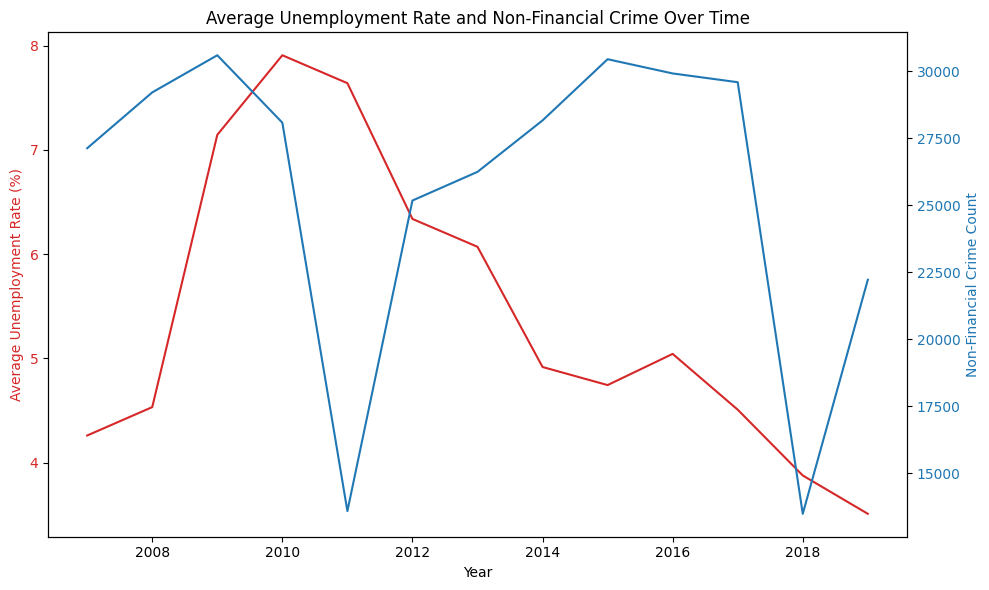

In [ ]:
aggregated_data = merged_data.groupby('Year').agg({
    'Unemployment Rate': 'mean',
    'Non-Financial Crime': 'sum'
}).reset_index()

# Create a figure and a subplot with its own y-axis for the Unemployment Rate
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average Unemployment Rate on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Unemployment Rate (%)', color=color)
ax1.plot(aggregated_data['Year'], aggregated_data['Unemployment Rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Total Crime sum
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Non-Financial Crime Count', color=color)
ax2.plot(aggregated_data['Year'], aggregated_data['Non-Financial Crime'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and a grid
plt.title('Average Unemployment Rate and Non-Financial Crime Over Time')
fig.tight_layout()

# Show the plot
plt.show()

3. Correlation Matrix

In [ ]:
# Aggregate the data by 'Year'
yearly_data = merged_data.groupby('Year').agg({
    'Unemployment Rate': 'mean',
    'Financial Crime': 'sum',
    'Non-Financial Crime': 'sum'
}).reset_index()

# Drop the 'Year' column for correlation as it's not a variable
yearly_data.drop('Year', axis=1, inplace=True)

# Calculate the correlation matrix
correlation_matrix = yearly_data.corr()

# Output the correlation matrix
print(correlation_matrix)

                     Unemployment Rate  Financial Crime  Non-Financial Crime
Unemployment Rate             1.000000         0.357299            -0.014754
Financial Crime               0.357299         1.000000             0.850481
Non-Financial Crime          -0.014754         0.850481             1.000000


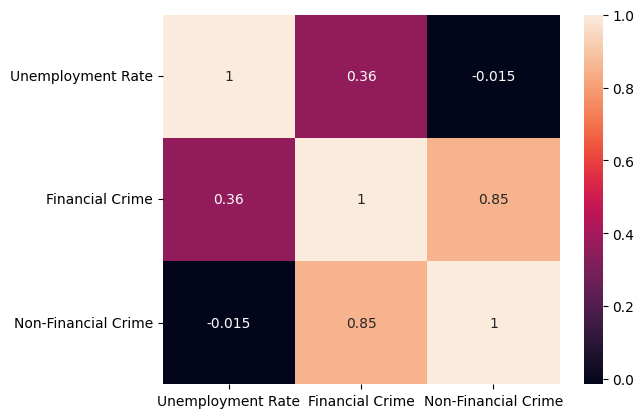

In [ ]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Police data

In [ ]:
# Load the datasets
unemployment_crime_data = pd.read_excel('/content/aggregated_texas_crime_unemployment_2007_2019.xlsx')
police_data = pd.read_excel('/content/texas_police_2007_2019.xls')

In [ ]:
# Merge the datasets on both 'Year' and 'County'
merged_data = pd.merge(unemployment_crime_data, police_data, on=['Year', 'County'])

# Save the merged data to a new Excel file
output_file_path = '/content/aggregated_texas_crime_unemployment_police_2007_2019.xlsx'
merged_data.to_excel(output_file_path, index=False)

In [ ]:
merged_data.head(5)

,Year,County,Unemployment Rate,Metropolitan/Non-metropolitan,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Financial Crime,Non-Financial Crime,State,Total law enforcement employees,Total officers,Total civilians
0,2007,Anderson,5.125000,Nonmetropolitan Counties,70,3,13,4,50,432,215,186,31,1.0,436,136,TEXAS-Nonmetropolitan Counties,80,34,46
1,2007,Andrews,3.258333,Nonmetropolitan Counties,4,0,1,0,3,94,18,72,4,0.0,94,8,NaN,29,11,18
2,2007,Angelina,4.433333,Nonmetropolitan Counties,189,4,9,12,164,458,174,243,41,0.0,470,366,NaN,60,46,14
3,2007,Aransas,4.108333,Metropolitan Counties,27,2,6,4,15,562,198,345,19,1.0,566,50,TEXAS-Metropolitan Counties,58,22,36
4,2007,Armstrong,3.416667,Metropolitan Counties,1,0,1,0,0,6,1,5,0,0.0,6,2,NaN,6,2,4


## Real Median Household Income

In [ ]:
!unzip /content/median-income.zip -d /content/Real_Median_Household_Income

In [ ]:
import pandas as pd
import os

def process_file(file_path):
    """
    Process an individual Excel file and return a DataFrame with relevant columns.
    """
    df = pd.read_excel(file_path)
    county_name = os.path.basename(file_path).replace('.xlsx', '')  # Extracting county name from file name
    df['County'] = county_name
    df['Year'] = pd.to_datetime(df['date']).dt.year  # Extracting year from the date
    df['Median Income'] = df['value']  # Renaming 'value' column to 'Median Income'
    return df[['County', 'Year', 'Median Income']]

def aggregate_data(directory_path):
    """
    Aggregate data from all Excel files in the specified directory.
    """
    all_data = []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        if os.path.isfile(file_path) and file_name.endswith('.xlsx'):
            df = process_file(file_path)
            all_data.append(df)

    return pd.concat(all_data, ignore_index=True)

# Path to the directory containing the Excel files
directory_path = '/content/Real_Median_Household_Income/content/median-income/'

# Aggregating the data
aggregated_data = aggregate_data(directory_path)

# Displaying the first few rows of the aggregated data
print(aggregated_data.head())


     County  Year  Median Income
0  McLennan  1989        22571.0
1  McLennan  1990            NaN
2  McLennan  1991            NaN
3  McLennan  1992            NaN
4  McLennan  1993        26512.0


In [ ]:
aggregated_data=aggregated_data[(aggregated_data["Year"]>2006) & (aggregated_data["Year"]<2020)]

,County,Year,Median Income
18,McLennan,2007,40459.0
19,McLennan,2008,40223.0
20,McLennan,2009,38963.0
21,McLennan,2010,39620.0
22,McLennan,2011,40563.0
...,...,...,...
253,Dimmit,2011,30503.0
254,Dimmit,2012,33342.0
255,Dimmit,2013,35801.0
256,Dimmit,2014,36856.0


In [ ]:
# Save the aggregated_data data to a new Excel file
output_file_path = '/content/aggregated_texas_median_income_2007_2019.xlsx'
aggregated_data.to_excel(output_file_path, index=False)

In [ ]:
# Load the datasets
income_data = pd.read_excel('/content/aggregated_texas_median_income_2007_2019.xlsx')
merged_data = pd.read_excel('/content/aggregated_texas_crime_unemployment_police_2007_2019.xlsx')

In [ ]:
# Merge the datasets on both 'Year' and 'County'
merged_income_data = pd.merge(income_data, merged_data, on=['Year', 'County'])

# Save the merged data to a new Excel file
output_file_path = '/content/aggregated_texas_crime_unemployment_police_income_2007_2019.xlsx'
merged_income_data.to_excel(output_file_path, index=False)

In [ ]:
merged_income_data.head(10)

,County,Year,Median Income,Unemployment Rate,Metropolitan/Non-metropolitan,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,...,Burglary,Larceny-theft,Motor vehicle theft,Arson,Financial Crime,Non-Financial Crime,State,Total law enforcement employees,Total officers,Total civilians
0,McLennan,2007,40459,4.266667,Metropolitan Counties,114,2,31,8,73,...,336,444,75,7.0,863,220,NaN,307,103,204
1,McLennan,2008,40223,4.533333,Metropolitan Counties,113,1,39,8,65,...,287,441,71,12.0,807,218,NaN,300,104,196
2,McLennan,2009,38963,6.691667,Metropolitan Counties,104,2,34,6,62,...,269,386,58,10.0,719,202,NaN,307,110,197
3,McLennan,2010,39620,7.400000,Metropolitan Counties,109,0,38,7,64,...,304,405,56,14.0,772,211,NaN,353,115,238
4,McLennan,2011,40563,7.675000,Metropolitan Counties,86,1,32,2,51,...,353,435,38,6.0,828,170,NaN,350,121,229
5,McLennan,2012,40855,6.600000,Metropolitan Counties,80,0,21,4,55,...,287,387,43,4.0,721,156,NaN,338,115,223
6,McLennan,2013,41066,6.233333,Metropolitan Counties,69,0,23,4,42,...,224,324,62,6.0,614,134,NaN,335,124,211
7,McLennan,2014,43488,5.125000,Metropolitan Counties,66,4,20,1,41,...,181,271,47,3.0,500,131,NaN,339,115,224
8,McLennan,2015,46264,4.108333,Metropolitan Counties,80,1,29,5,45,...,182,250,41,2.0,478,155,NaN,373,123,250
9,McLennan,2016,46662,3.966667,Metropolitan Counties,96,1,25,5,65,...,183,265,55,6.0,508,187,NaN,378,97,281


## Population

In [ ]:
# Load the datasets
population_data = pd.read_excel('/content/Reshaped_Texas_Population_2007_2019.xlsx')
merged_data = pd.read_excel('/content/aggregated_texas_crime_unemployment_police_income_2007_2019.xlsx')

In [ ]:
# Merge the datasets on both 'Year' and 'County'
merged_population_data = pd.merge(population_data, merged_data, on=['Year', 'County'])

# Save the merged data to a new Excel file
output_file_path = '/content/aggregated_texas_crime_unemployment_police_income_population_2007_2019.xlsx'
merged_population_data.to_excel(output_file_path, index=False)

## Education Attainment

In [ ]:
# Load the datasets
education_data = pd.read_excel('/content/texas_county_education_rate.xlsx')
merged_data = pd.read_excel('/content/aggregated_texas_crime_unemployment_police_income_population_2007_2019.xlsx')

In [ ]:
# Convert 'Date' to a datetime format
education_data['Date'] = pd.to_datetime(education_data['Date'])

# Extract the year from the datetime
education_data['Year'] = education_data['Date'].dt.year

# Filter the data for years between 2007 and 2019
education_data_filtered = education_data[(education_data['Year'] >= 2007) & (education_data['Year'] <= 2019)]

# Aggregate the data by year and county
# Use as_index=False to keep 'Year' and 'County' as columns
yearly_education = education_data_filtered.groupby(['Year', 'County'], as_index=False)['Bachelor Rate'].mean()

# Output the first 20 rows of the yearly data
print(yearly_education.head(20))

    Year     County  Bachelor Rate
0   2010   Anderson           11.3
1   2010    Andrews           12.4
2   2010   Angelina           15.9
3   2010    Aransas           23.9
4   2010     Archer           18.8
5   2010  Armstrong           25.9
6   2010   Atascosa           11.0
7   2010     Austin           17.9
8   2010     Bailey           18.5
9   2010    Bandera           24.0
10  2010    Bastrop           17.9
11  2010     Baylor           24.5
12  2010        Bee            9.2
13  2010       Bell           21.2
14  2010      Bexar           25.3
15  2010     Blanco           25.4
16  2010     Borden           19.1
17  2010     Bosque           14.8
18  2010      Bowie           18.1
19  2010   Brazoria           26.1


In [ ]:
# Save the aggregated data to a new Excel file
output_file_path = '/content/aggregated_texas_bachelor_attainment_2007_2019.xlsx'
yearly_education.to_excel(output_file_path, index=False)

In [ ]:
# Load the datasets
education_data = pd.read_excel('/content/synthetic_texas_bachelor_attainment_2007_2009.xlsx')

In [ ]:
# Merge the datasets on both 'Year' and 'County'
merged_education_data = pd.merge(education_data, merged_data, on=['Year', 'County'])

# Save the merged data to a new Excel file
output_file_path = '/content/aggregated_texas_full_2007_2019.xlsx'
merged_education_data.to_excel(output_file_path, index=False)

## Visualizations with full data

In [ ]:
# Load the datasets
data = pd.read_excel('/content/aggregated_texas_full_2007_2019.xlsx')

In [ ]:
# Calculating Crime Rates per 100,000 inhabitants

# Financial Crime Rate
data['Financial Crime Rate'] = (data['Financial Crime'] / data['Population']) * 100000

# Non-Financial Crime Rate
data['Non-Financial Crime Rate'] = (data['Non-Financial Crime'] / data['Population']) * 100000

# Crime Rate
data['Crime Rate'] = (data['Non-Financial Crime'] / data['Population']) * 100000

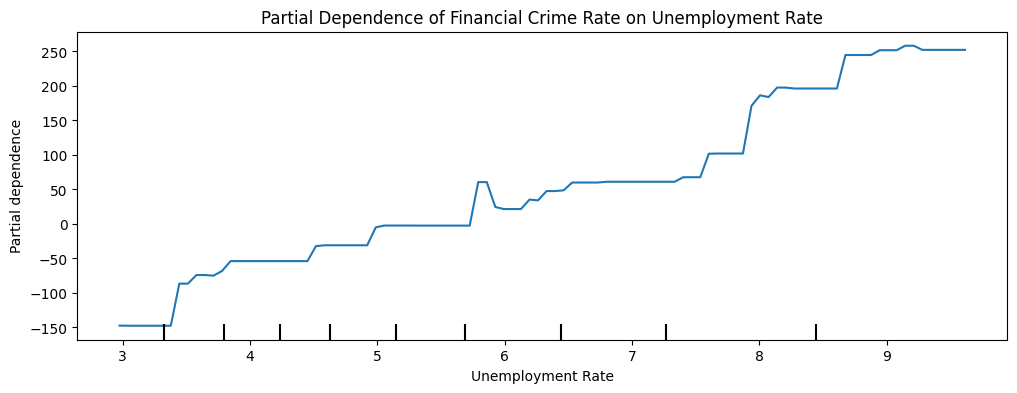

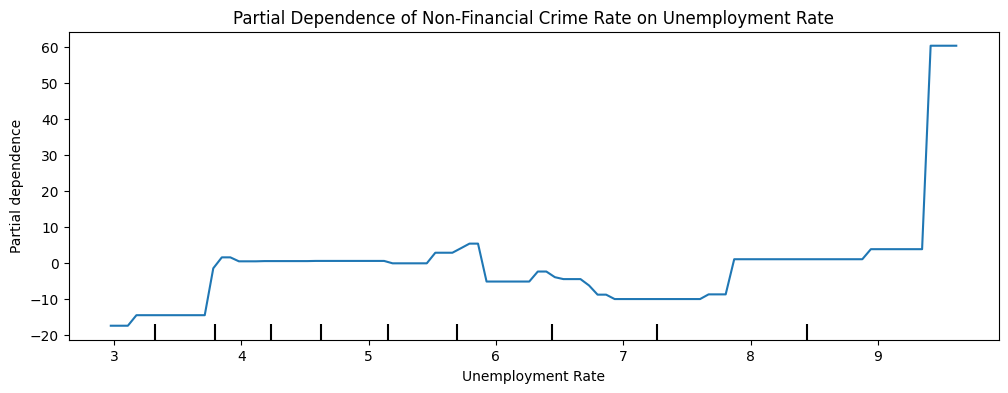

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# The relevant columns are: 'Unemployment Rate', 'Financial Crime Rate', 'Non-Financial Crime Rate',
# 'Total law enforcement employees', 'Bachelor Rate', 'Population', 'Median Income'
features = ['Unemployment Rate', 'Total law enforcement employees', 'Bachelor Rate', 'Population', 'Median Income']
X = data[features]
y_financial = data['Financial Crime Rate']
y_non_financial = data['Non-Financial Crime Rate']

# Building the model for Financial Crime Rate
model_financial = GradientBoostingRegressor()
model_financial.fit(X, y_financial)

# Building the model for Non-Financial Crime Rate
model_non_financial = GradientBoostingRegressor()
model_non_financial.fit(X, y_non_financial)

# Plotting Partial Dependence Plots for Financial Crime Rate
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(model_financial, X, features=['Unemployment Rate'], ax=ax)
plt.title('Partial Dependence of Financial Crime Rate on Unemployment Rate')
plt.show()

# Plotting Partial Dependence Plots for Non-Financial Crime Rate
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(model_non_financial, X, features=['Unemployment Rate'], ax=ax)
plt.title('Partial Dependence of Non-Financial Crime Rate on Unemployment Rate')
plt.show()


In [ ]:
# Now we calculate the normalized police presence by population
data['Police Presence per 10000'] = (data['Total law enforcement employees'] / data['Population']) * 10000

<ipython-input-17-9730936d3953>:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Police Presence per 10,000')


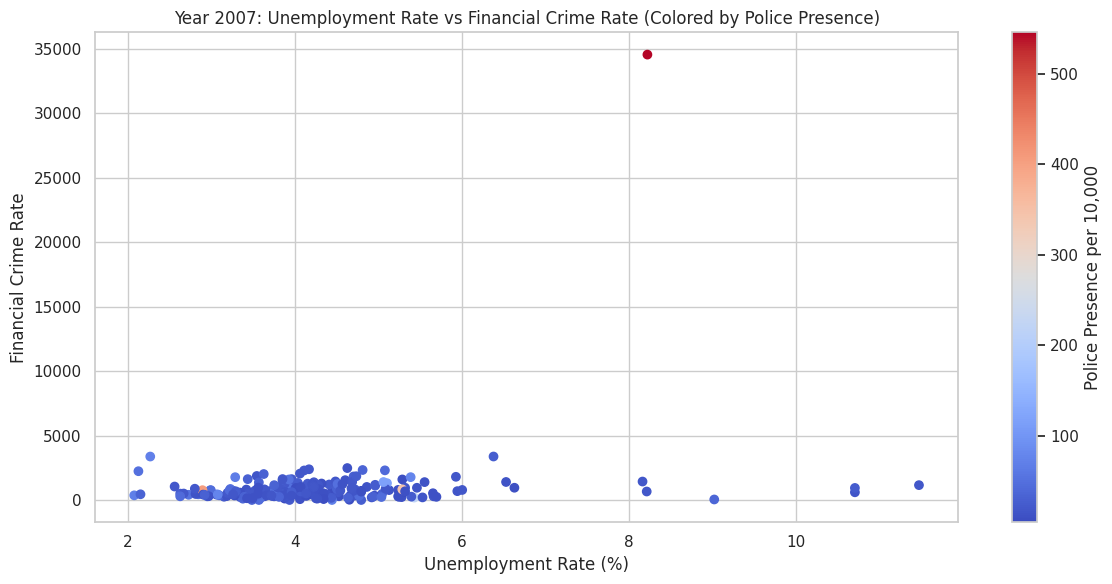

<ipython-input-17-9730936d3953>:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Police Presence per 10,000')


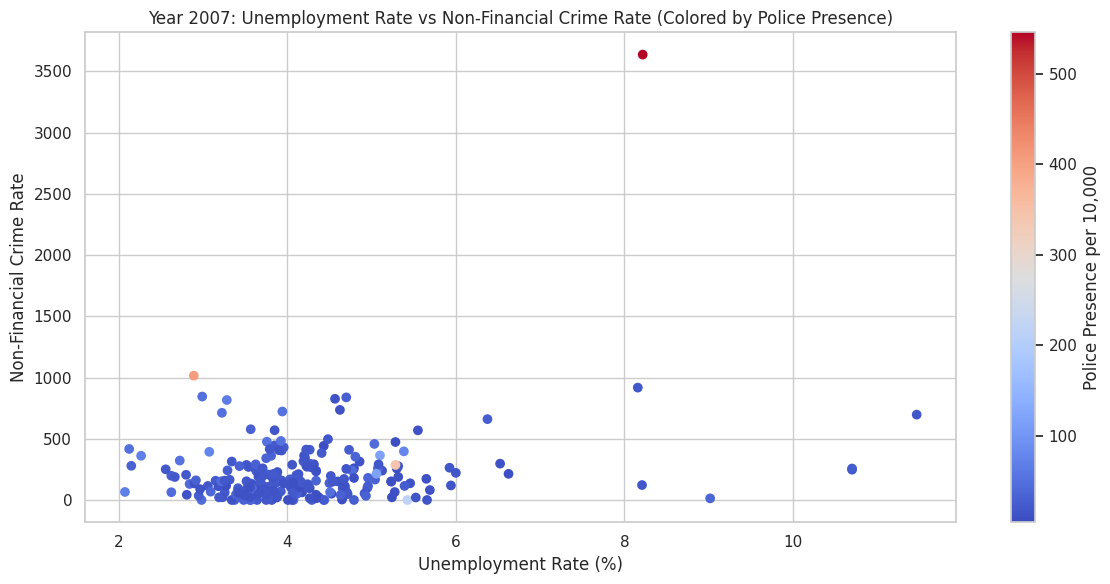

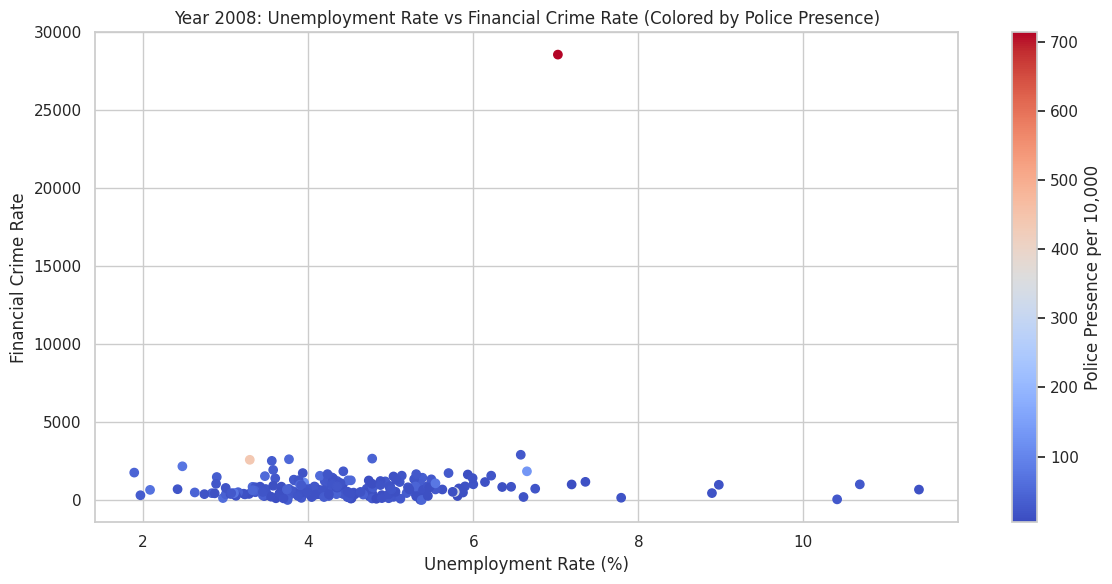

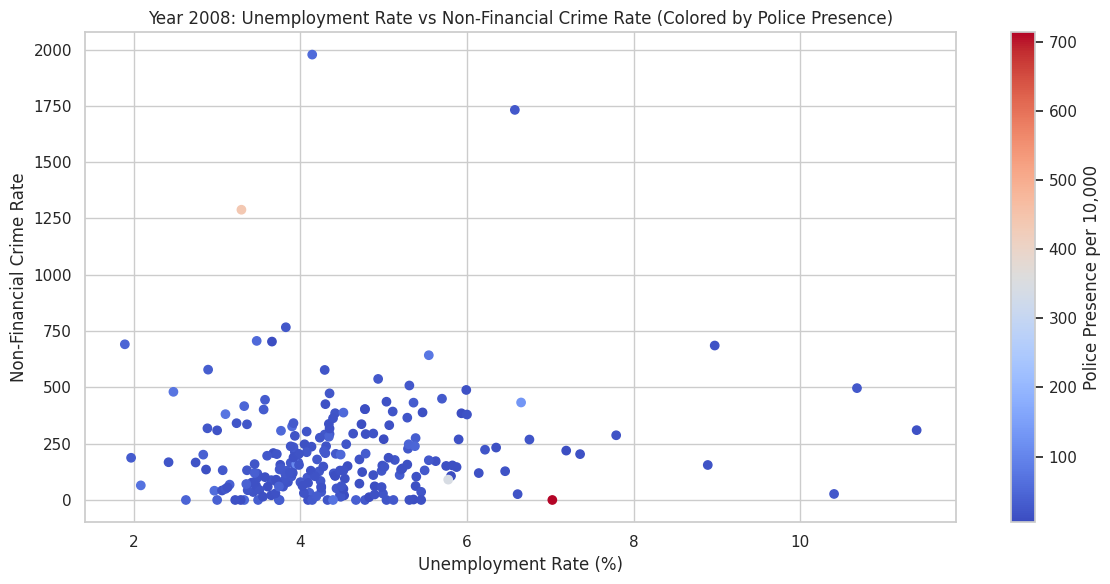

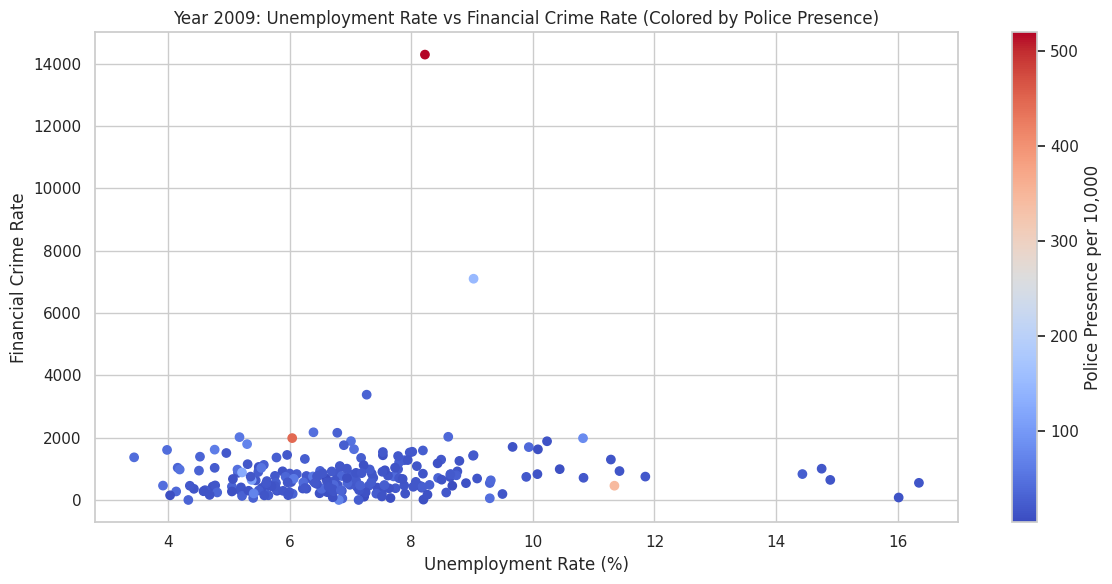

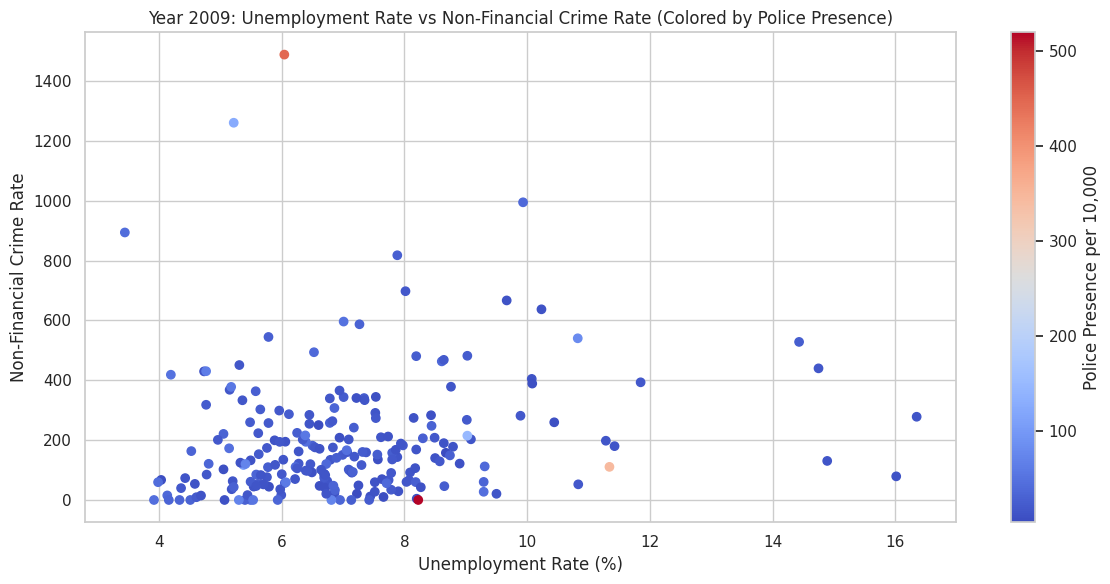

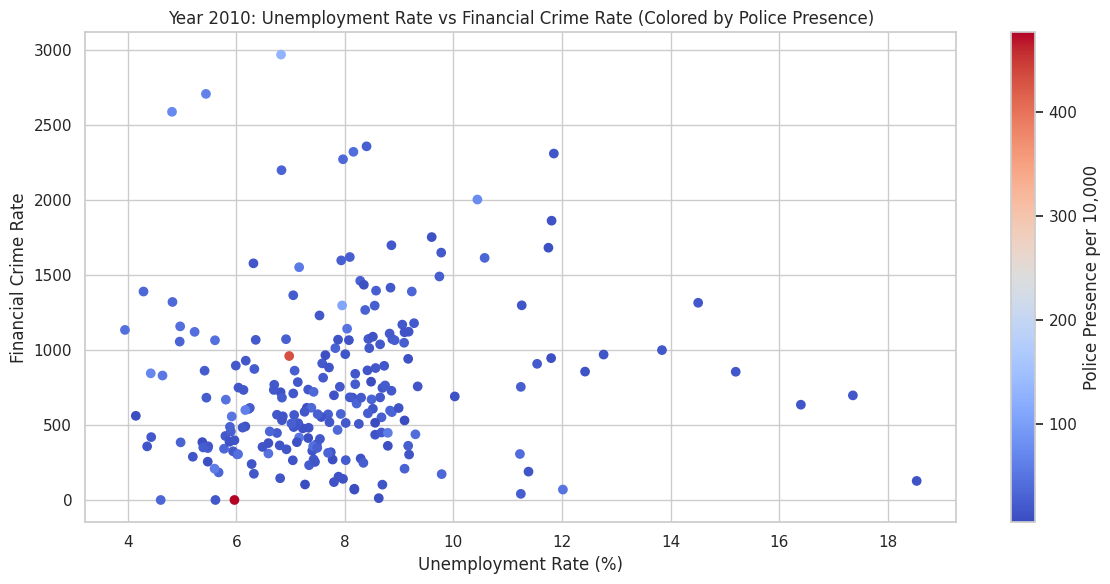

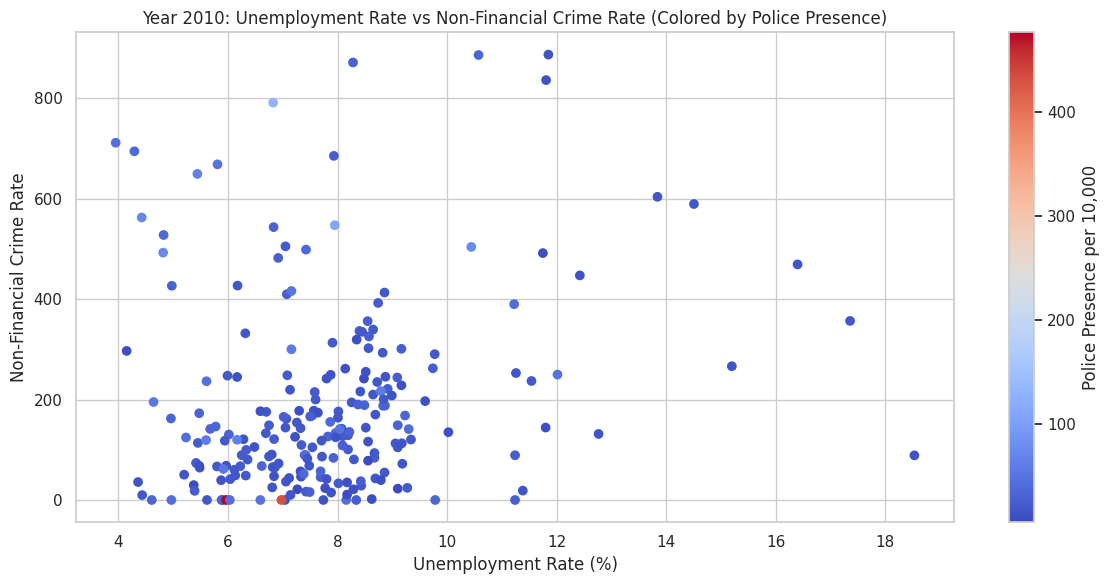

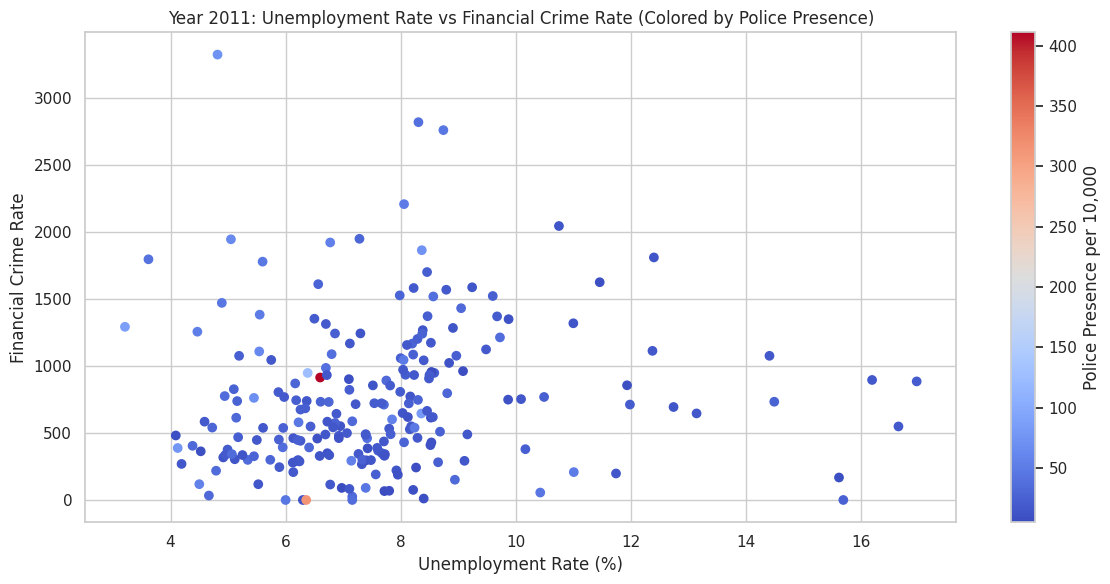

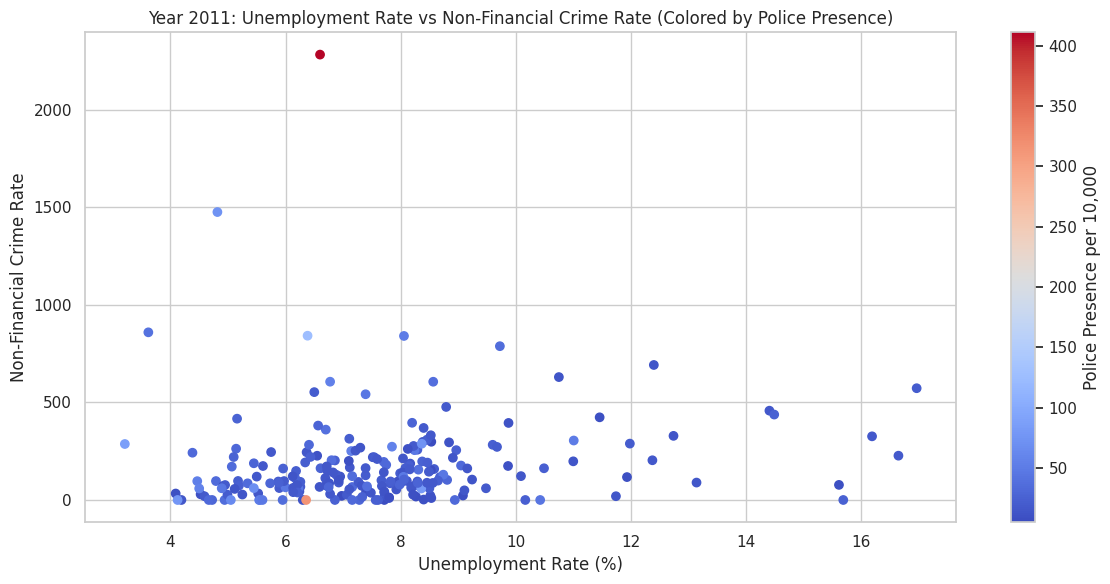

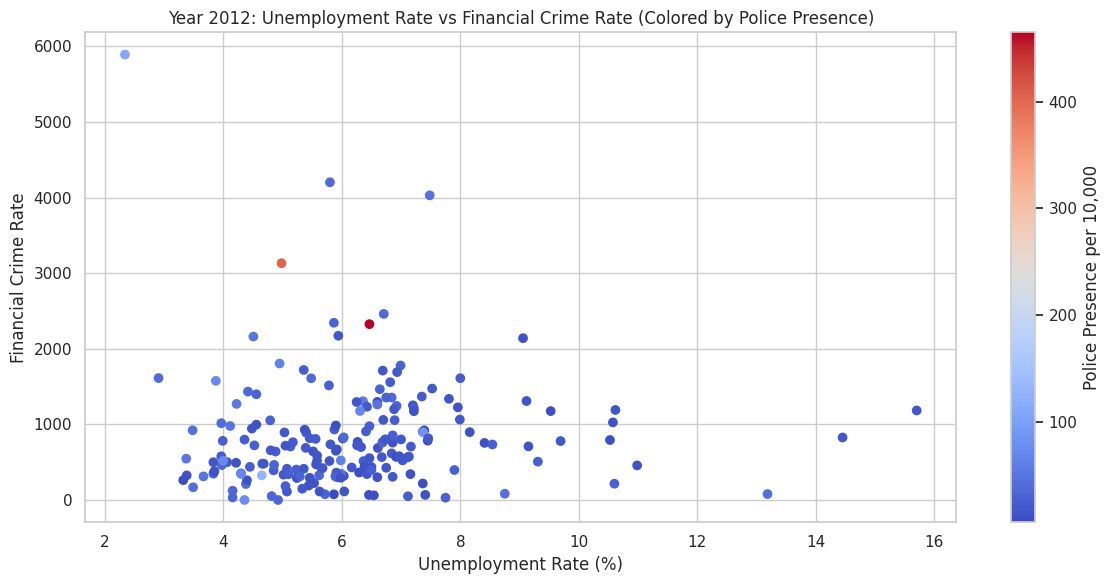

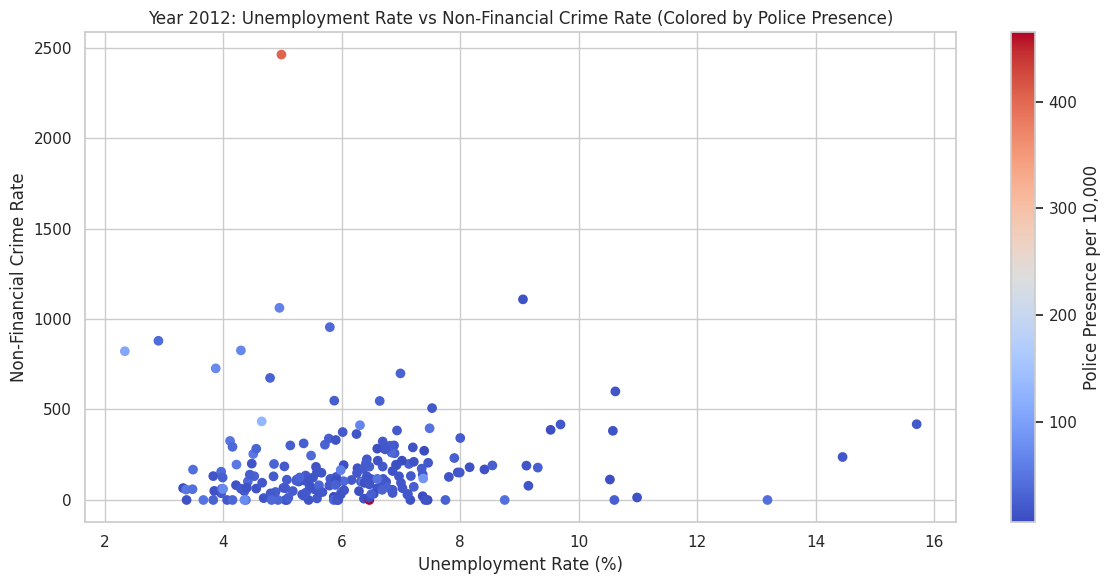

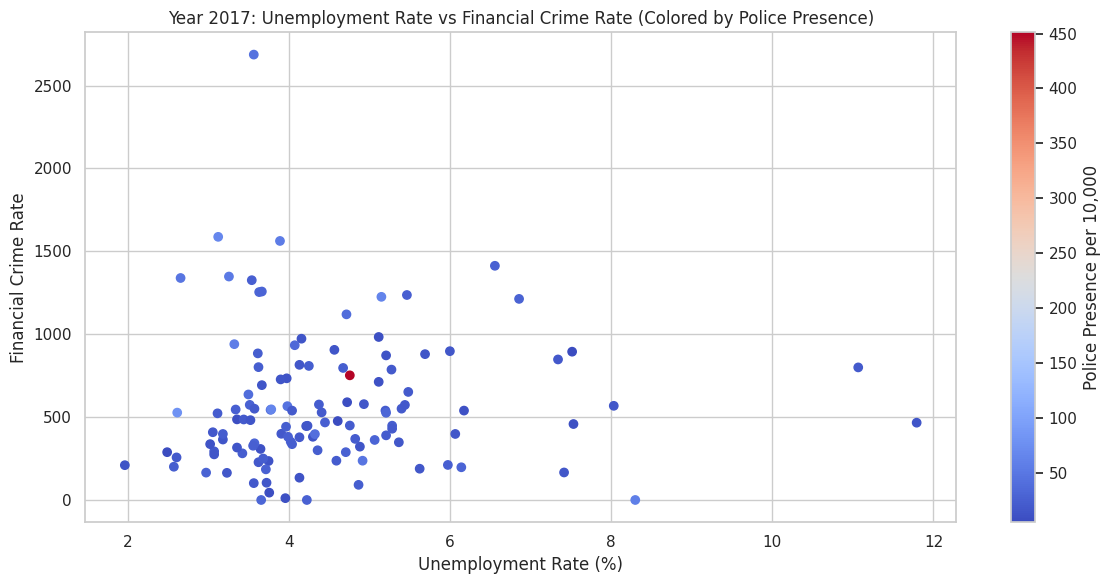

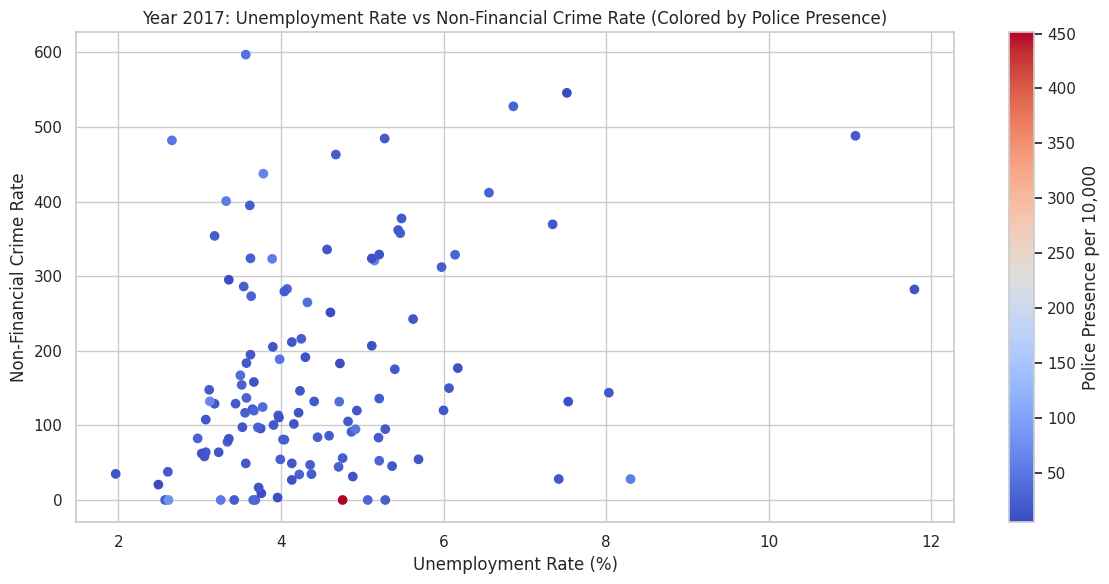

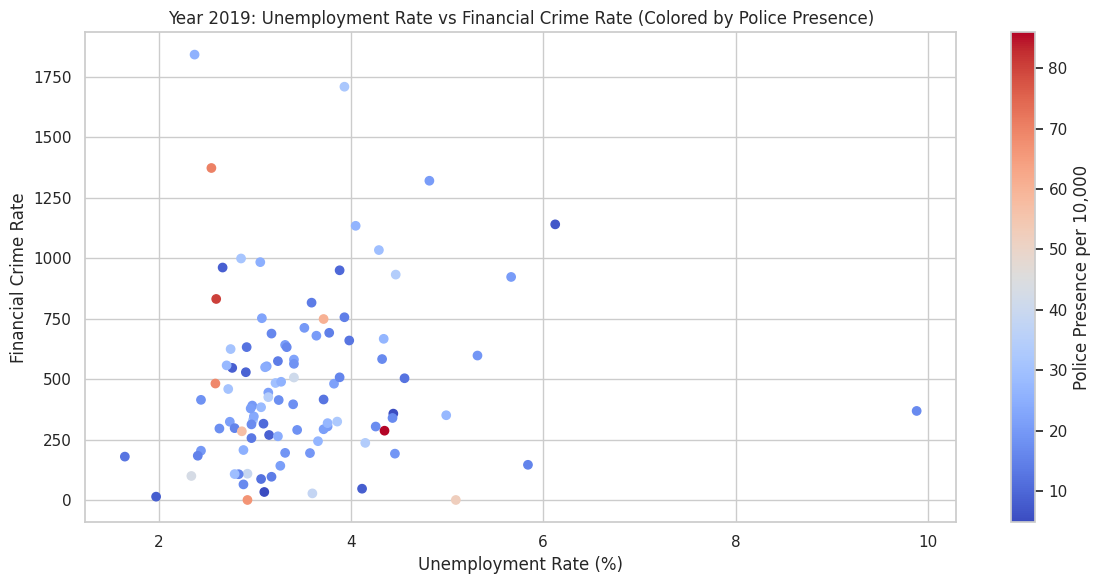

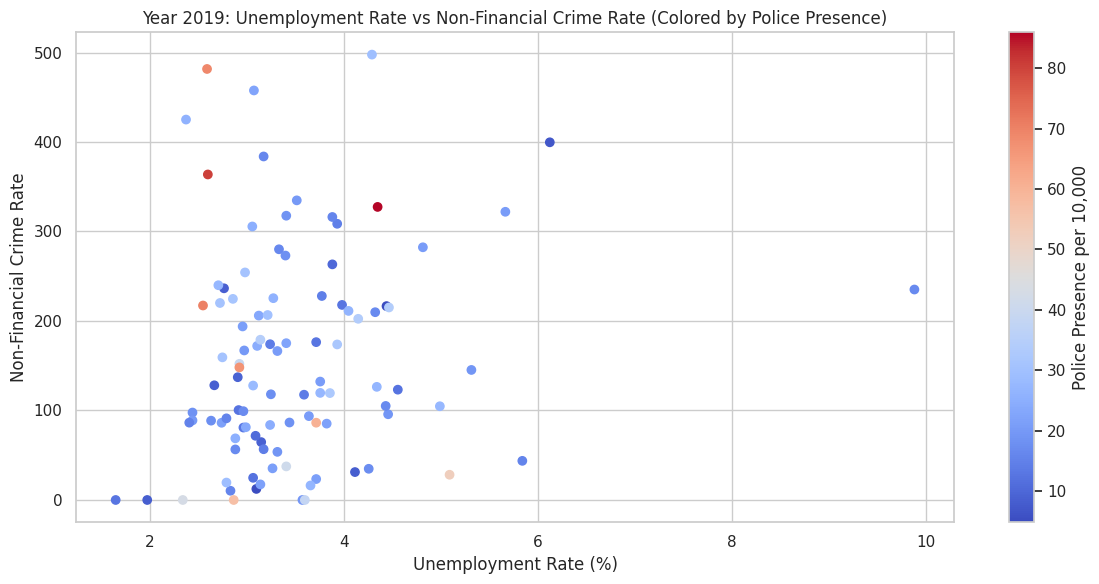

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

years = np.array([2007, 2008, 2009, 2010,2011, 2012, 2017, 2019])

# Get a colormap
cmap = plt.cm.coolwarm

for year in years:
    # Filtering data for the specific year
    year_data = data[data['Year'] == year]

    # Normalize 'Police Presence per 10000' for the year to use for coloring
    norm = mcolors.Normalize(vmin=year_data['Police Presence per 10000'].min(),
                             vmax=year_data['Police Presence per 10000'].max())

    # Create a ScalarMappable and initialize a data structure
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # only needed for matplotlib < 3.1

    # Plot for Financial Crime Rate
    plt.figure(figsize=(12, 6))
    plt.scatter(year_data['Unemployment Rate'], year_data['Financial Crime Rate'],
                c=cmap(norm(year_data['Police Presence per 10000'].values)))
    plt.title(f'Year {year}: Unemployment Rate vs Financial Crime Rate (Colored by Police Presence)')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel('Financial Crime Rate')
    plt.colorbar(sm, label='Police Presence per 10,000')
    plt.tight_layout()
    plt.show()

    # Plot for Non-Financial Crime Rate
    plt.figure(figsize=(12, 6))
    plt.scatter(year_data['Unemployment Rate'], year_data['Non-Financial Crime Rate'],
                c=cmap(norm(year_data['Police Presence per 10000'].values)))
    plt.title(f'Year {year}: Unemployment Rate vs Non-Financial Crime Rate (Colored by Police Presence)')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel('Non-Financial Crime Rate')
    plt.colorbar(sm, label='Police Presence per 10,000')
    plt.tight_layout()
    plt.show()


In [ ]:
# This will remove leading and trailing spaces
data['Metropolitan/Non-metropolitan'] = data['Metropolitan/Non-metropolitan'].str.strip()

In [ ]:
data.to_excel('/content/aggregated_texas_2007_2019.xlsx', index=False)